In [1]:
#importing all libraries
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
#import seaborn as sns  
from sklearn.datasets import make_classification  
#from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
#from sklearn.feature_selection import SelectFromModel
#Define the function and place the components.
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [3]:
# Importing the dataset
dataset = pd.read_csv('/home/ankita/Desktop/working_file/dir_15_07_2020_ml/906_iso_res+sus_scrt_genome_kmer_matrix.csv.csv',chunksize=200,sep=",",low_memory=False,dtype="int8")

# Encoding categorical data
#labelencoder_y = LabelEncoder()
#y = labelencoder_y.fit_transform(y)

In [4]:
chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in dataset:  
    # perform data filtering 
    #chunk_filter = do_preprocessing(chunk)
    
    # Once the data filtering is done, append the chunk to list
    #chunk_list.append(chunk_filter)
    chunk_list.append(chunk)
    
# concat the list into dataframe 
df_concat = pd.concat(chunk_list)

In [6]:
df_concat.info()
print(df_concat.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Columns: 1251908 entries, Unnamed: 0 to label
dtypes: int8(1251908)
memory usage: 1.1 GB
(906, 1251908)


In [7]:
X = df_concat.iloc[:,1 :-1].values
y = df_concat.iloc[:, -1].values

In [8]:
print(len(X))
print(len(y))

906
906


In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split as ttsplit
X_train, X_test, y_train, y_test = ttsplit(X, y, test_size = 0.2, random_state = 0)
X_train1, X_train2, y_train1, y_train2 = ttsplit (X_train, y_train, test_size =0.5, random_state=0)

In [10]:
#use any algorithm to fit, that is learning the data
model = RandomForestClassifier(max_depth=15,min_samples_leaf=1,min_samples_split=5,n_estimators=500)  
model1= model.fit(X_train1, y_train1)
model2=model1.fit(X_train2,y_train2)
print(); print(model1); print(model2)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=Non

In [11]:
dataset.info()
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

AttributeError: 'TextFileReader' object has no attribute 'info'

In [12]:
#predicting the Test set results
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(metrics.classification_report(y_test, y_pred))

Accuracy: 85.16%
              precision    recall  f1-score   support

           0       0.78      1.00      0.87        94
           1       1.00      0.69      0.82        88

    accuracy                           0.85       182
   macro avg       0.89      0.85      0.85       182
weighted avg       0.88      0.85      0.85       182



In [ ]:
#k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator = model,X = X_train, y=y_train, cv =10)
accuracies.mean()
accuracies.std()

In [13]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print (cm) 

[[94  0]
 [27 61]]


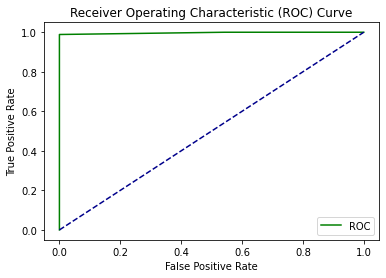

0.9969173114119922


In [14]:
#plot the ROC curve
probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
auc=metrics.auc(fper, tper)
plot_roc_curve(fper, tper)
print(auc)

In [ ]:
np.save('/home/ankita/Desktop/working_file/dir_15_07_2020_ml/fper.npy',fper)
np.save('/home/ankita/Desktop/working_file/dir_15_07_2020_ml/tper.npy',tper)
np.save('/home/ankita/Desktop/working_file/dir_15_07_2020_ml/threshold.npy', thresholds)